In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [67]:
df_train = pd.read_csv('Training.csv')
df_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [68]:
df_train.drop(columns='Unnamed: 133', inplace=True)

In [69]:
df_train['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

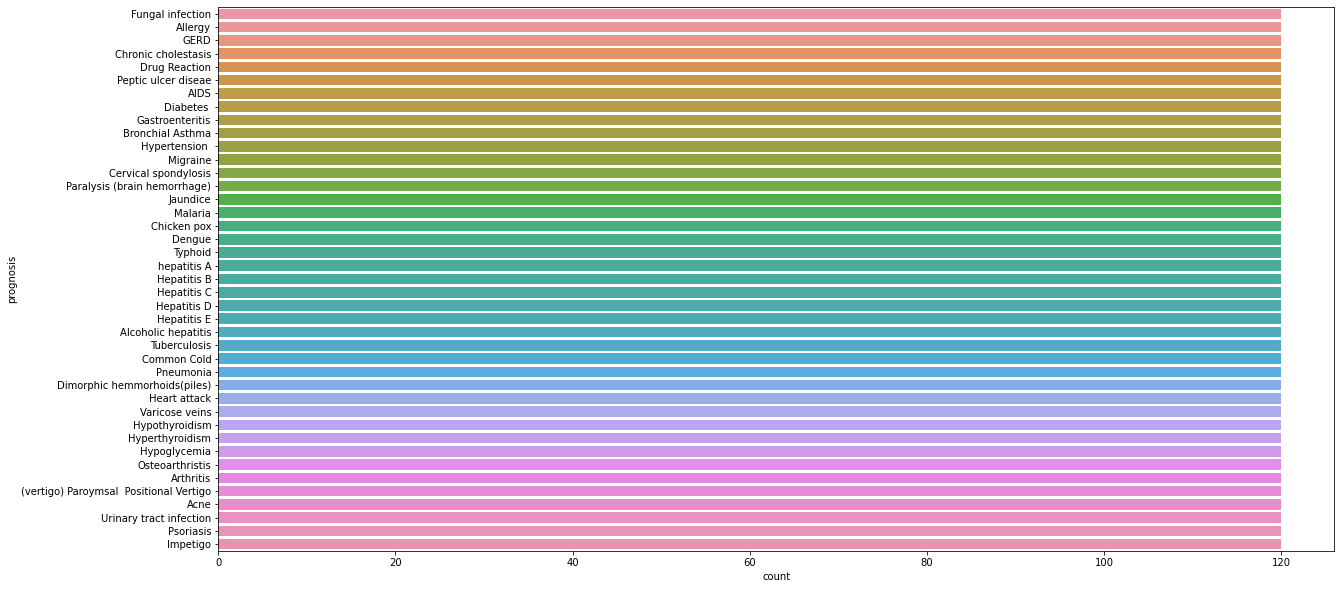

In [70]:
plt.figure(figsize=(20,10))
sns.countplot(y=df_train['prognosis'])
plt.show()

In [71]:
diseases = ['Hepatitis C', 'Common Cold', 'Pneumonia', 'Heart attack', 'Varicose veins', 'Hypothyroidism', 
            'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis', 'Acne', 'Urinary tract infection',
            'Hepatitis B', 'Allergy', 'GERD', 'Drug Reaction', 'Peptic ulcer diseae', 'Diabetes ', 'Gastroenteritis', 
            'Hypertension ', 'Migraine', 'Paralysis (brain hemorrhage)', 'Typhoid']

In [72]:
new_df = df_train.loc[(df_train['prognosis'].isin(diseases))]

In [73]:
new_df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
10,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
11,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
12,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
13,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
14,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypoglycemia
4913,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Osteoarthristis
4914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Arthritis
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne


In [74]:
new_df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [75]:
new_df['prognosis'].value_counts()

Allergy                         120
Common Cold                     120
Acne                            120
Arthritis                       120
Osteoarthristis                 120
Hypoglycemia                    120
Hyperthyroidism                 120
Hypothyroidism                  120
Varicose veins                  120
Heart attack                    120
Pneumonia                       120
Hepatitis C                     120
GERD                            120
Hepatitis B                     120
Typhoid                         120
Paralysis (brain hemorrhage)    120
Migraine                        120
Hypertension                    120
Gastroenteritis                 120
Diabetes                        120
Peptic ulcer diseae             120
Drug Reaction                   120
Urinary tract infection         120
Name: prognosis, dtype: int64

In [76]:
new_df[new_df.columns[12]].value_counts()

0    2544
1     216
Name: burning_micturition, dtype: int64

In [77]:
for i in range(0, len(new_df.columns)):
    print(new_df[new_df.columns[i]].value_counts())

0    2532
1     228
Name: itching, dtype: int64
0    2538
1     222
Name: skin_rash, dtype: int64
0    2760
Name: nodal_skin_eruptions, dtype: int64
0    2538
1     222
Name: continuous_sneezing, dtype: int64
0    2652
1     108
Name: shivering, dtype: int64
0    2304
1     456
Name: chills, dtype: int64
0    2646
1     114
Name: joint_pain, dtype: int64
0    2538
1     222
Name: stomach_pain, dtype: int64
0    2538
1     222
Name: acidity, dtype: int64
0    2652
1     108
Name: ulcers_on_tongue, dtype: int64
0    2760
Name: muscle_wasting, dtype: int64
0    1986
1     774
Name: vomiting, dtype: int64
0    2544
1     216
Name: burning_micturition, dtype: int64
0    2652
1     108
Name: spotting_ urination, dtype: int64
0    1620
1    1140
Name: fatigue, dtype: int64
0    2646
1     114
Name: weight_gain, dtype: int64
0    2646
1     114
Name: anxiety, dtype: int64
0    2646
1     114
Name: cold_hands_and_feets, dtype: int64
0    2532
1     228
Name: mood_swings, dtype: int64
0    2532


In [78]:
del_cols = ['yellow_crust_ooze', 'red_sore_around_nose', 'blister', 'inflammatory_nails', 'small_dents_in_nails', 'silver_like_dusting',
'skin_peeling', 'blood_in_sputum', 'fluid_overload.1', 'history_of_alcohol_consumption', 'distention_of_abdomen', 
'stomach_bleeding', 'coma', 'mucoid_sputum', 'dischromic _patches', 'red_spots_over_body', 'unsteadiness', 'spinning_movements',
'extra_marital_contacts', 'irritation_in_anus', 'bloody_stool', 'pain_in_anal_region', 'pain_during_bowel_movements',
'weakness_in_limbs', 'swelling_of_stomach', 'fluid_overload', 'acute_liver_failure', 'mild_fever', 'back_pain', 
 'pain_behind_the_eyes']

In [79]:
new_df = new_df.drop(columns = del_cols, axis=1)

In [80]:
new_df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,prognosis
10,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
11,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
12,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
13,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
14,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Hypoglycemia
4913,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,Osteoarthristis
4914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Arthritis
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Acne


In [81]:
new_df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
painful_walking         0
pus_filled_pimples      0
blackheads              0
scurring                0
prognosis               0
Length: 103, dtype: int64

In [82]:
prognosis = {'Allergy':0, 'Common Cold':1, 'Acne':2, 'Arthritis':3, 'Osteoarthristis':4, 'Hypoglycemia':5, 'Hyperthyroidism':6, 
             'Hypothyroidism':7, 'Varicose veins':8, 'Heart attack':9, 'Pneumonia':10, 'Hepatitis C':11, 'GERD':12, 
             'Hepatitis B':13, 'Typhoid':14, 'Paralysis (brain hemorrhage)':15, 'Migraine':16, 'Hypertension ':17, 
             'Gastroenteritis':18, 'Diabetes ':19, 'Peptic ulcer diseae':20, 'Drug Reaction':21, 'Urinary tract infection':22}
new_df['prognosis'].replace(prognosis, inplace=True)

In [83]:
new_df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,prognosis
10,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5
4913,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,4
4914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,2


In [84]:
new_df['prognosis'] = pd.to_numeric(new_df['prognosis'], errors='coerce')

In [85]:
new_df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,prognosis
10,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5
4913,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,4
4914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,2


In [86]:
new_df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
painful_walking         0
pus_filled_pimples      0
blackheads              0
scurring                0
prognosis               0
Length: 103, dtype: int64

In [87]:
new_df['prognosis'].unique()

array([ 0, 12, 21, 20, 19, 18, 17, 16, 15, 14, 13, 11,  1, 10,  9,  8,  7,
        6,  5,  4,  3,  2, 22], dtype=int64)

In [89]:
X = new_df.drop(columns=['prognosis'])
y = new_df['prognosis']

In [90]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 , f_classif 

FeatureSelection = SelectKBest(score_func= chi2 ,k=75)  
X = FeatureSelection.fit(X, y)

In [91]:
f = FeatureSelection.get_support(1)
X_new = new_df[new_df.columns[f]]

In [92]:
X_new

,itching,shivering,joint_pain,acidity,ulcers_on_tongue,spotting_ urination,weight_gain,anxiety,cold_hands_and_feets,mood_swings,...,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4913,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [93]:
X_new.columns

Index(['itching', 'shivering', 'joint_pain', 'acidity', 'ulcers_on_tongue',
       'spotting_ urination', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'irregular_sugar_level',
       'sunken_eyes', 'breathlessness', 'dehydration', 'yellowish_skin',
       'dark_urine', 'constipation', 'yellow_urine', 'yellowing_of_eyes',
       'swelled_lymph_nodes', 'phlegm', 'throat_irritation', 'redness_of_eyes',
       'sinus_pressure', 'runny_nose', 'congestion', 'fast_heart_rate',
       'neck_pain', 'cramps', 'bruising', 'obesity', 'swollen_legs',
       'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid',
       'brittle_nails', 'swollen_extremeties', 'drying_and_tingling_lips',
       'slurred_speech', 'knee_pain', 'hip_joint_pain', 'muscle_weakness',
       'stiff_neck', 'swelling_joints', 'movement_stiffness',
       'loss_of_balance', 'weakness_of_one_body_side', 'loss_of_smell',
       'bladder_discomfort', 'continuou

In [94]:
yes_no = {0:'No', 1:'Yes'}
cols = X_new.columns
for i in range(len(cols)):
    X_new[cols[i]] = X_new[cols[i]].replace(yes_no)

C:\Users\HP\AppData\Local\Temp\ipykernel_18528\1741977066.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new[cols[i]] = X_new[cols[i]].replace(yes_no)


In [96]:
my_df = pd.concat([X_new, y], axis=1)

In [97]:
my_df.to_csv('23_diseases', index=False)

In [98]:
df_ohe = pd.get_dummies(my_df, columns=cols, dummy_na=True)
df_ohe

,prognosis,itching_No,itching_Yes,itching_nan,shivering_No,shivering_Yes,shivering_nan,joint_pain_No,joint_pain_Yes,joint_pain_nan,...,painful_walking_nan,pus_filled_pimples_No,pus_filled_pimples_Yes,pus_filled_pimples_nan,blackheads_No,blackheads_Yes,blackheads_nan,scurring_No,scurring_Yes,scurring_nan
10,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
11,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
12,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
13,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
14,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,5,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4913,4,1,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4914,3,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4916,2,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [99]:
X = df_ohe.drop(columns='prognosis')
y = df_ohe['prognosis']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44, shuffle =True)

In [105]:
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train, y_train)

print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))

LogisticRegressionModel Train Score is :  1.0
LogisticRegressionModel Test Score is :  1.0


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


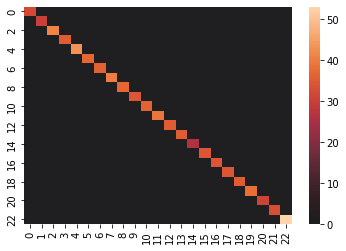

Confusion Matrix is
 [[32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 43  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 39  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 35

In [106]:
y_pred = LogisticRegressionModel.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, center=True)
plt.show()
print('Confusion Matrix is\n', CM)

In [107]:
from sklearn.metrics import f1_score, classification_report, accuracy_score

y_pred = LogisticRegressionModel.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        43
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        37
           9       1.00      1.00      1.00        34
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        39
          12       1.00      1.00      1.00        35
          13       1.00      1.00      1.00        35
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        34
          16       1.00      1.00      1.00        34
          17       1.00    

In [108]:
from joblib import Parallel, delayed
import joblib

joblib.dump(LogisticRegressionModel, 'general_diseases_model.pkl')

['general_diseases_model.pkl']

In [110]:
# Saving the data columns from training
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_general_diseases_columns.pkl')
print("Models columns dumped!")

Models columns dumped!
